In [3]:
from scipy import ndimage
import matplotlib.pyplot as plt
import imageio
import PIL
import numpy as np
import cv2 
import skimage

Пространственная фильтрация изображения – это метод, при котором каждая точка изображения последовательно обрабатывается с помощью оператора, представленного в виде квадратной матрицы. Результатом работы этого метода является оценка значимости каждого пикселя изображения. Одним из признаков значимости пикселей являются резкие перепады яркости.

Большинство рассмотренных ниже методов основываются на одном из базовых свойств сигнала яркости – разрывности. Наиболее общим способом поиска разрывов является обработка изображения с помощью скользящей маски, называемой также фильтром, ядром, окном или шаблоном, которая представляет собой некую квадратную матрицу, соответствующую указанной группе пикселей исходного изображения. Элементы матрицы принято называть коэффициентами. Оперирование такой матрицей в каких-либо локальных преобразованиях называется фильтрацией или пространственной фильтрацией.

Процесс основан на простом перемещении маски фильтра от точки к точке изображения; в каждой точке $(x,y)$ отклик фильтра вычисляется с использованием предварительно заданных связей. В случае линейной пространственной фильтрации отклик задается суммой произведения коэффициентов фильтра на соответствующие значения пикселей в области, покрытой маской фильтра.

При обнаружении перепадов яркости используются дискретные аналоги производных первого и второго порядка.

### Фильтр Гаусса

Фильтр размытия по гауссу (широко известный ''gaussian blur'' в фотошопе)
достаточно часто применяется сам по себе или как часть других алгоритмов
обработки изображений.

Применение размытия по Гауссу к изображению математически аналогично свёртке
изображения с помощью функции Гаусса. Оно также известно как двумерное
преобразование Вейерштрасса. Поскольку преобразование Фурье функции Гаусса само
является функцией Гаусса, применение размытия по Гауссу приводит к уменьшению
высокочастотных компонентов изображения. Таким образом, размытие по Гауссу
является фильтром нижних частот.


В этом способе размытия функция Гаусса (которая также используется для описания нормального распределения в теории вероятностей) используется для вычисления преобразования, применяемого к каждому пикселю изображения. Формула функции Гаусса в одном измерении:

$${\displaystyle G(x)={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {x^{2}}{2\sigma ^{2}}}}}$$

В двух измерениях это произведение двух функций Гаусса, по одной для каждого измерения:

$${\displaystyle G(x,y)={\frac {1}{2\pi \sigma ^{2}}}e^{-{\frac
{x^{2}+y^{2}}{2\sigma ^{2}}}}}$$

где $x$, $y$ — координаты точки, а $\sigma$ — среднеквадратическое отклонение нормального распределения. При применении в двух измерениях эта формула даёт поверхность, контуры которой представляют собой концентрические окружности с нормальным распределением относительно центральной точки.

In [4]:
filename = "/mnt/d/cv3/20230904_segm_rat_OFT_gray_back/20230904_segm_rat_OFT_gray_back/images/OFT_control_01$000152&03_@000374.bmp"
pic = PIL.Image.open(filename)
sigma = 10
pix = np.array(pic)
result = ndimage.gaussian_filter(pix, sigma)
PIL_image = PIL.Image.fromarray(np.uint8(result)).convert('L')
PIL_image.save("1.dicom.gauss_test.jpg")
plt.imshow(pic)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/d/cv3/20230904_segm_rat_OFT_gray_back/20230904_segm_rat_OFT_gray_back/images/OFT_control_01$000152&03_@000374.bmp'

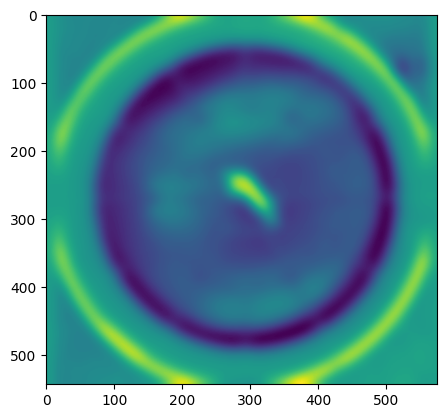

In [ ]:
plt.imshow(PIL_image)

### Фильтр Робертса

Перекрёстный оператор Робертса — один из ранних алгоритмов выделения границ, который вычисляет на плоском дискретном изображении сумму квадратов разниц между диагонально смежными пикселами. Это может быть выполнено сверткой изображения с двумя ядрами:
$$\begin{bmatrix}+1&0\\0&-1\\ \end{bmatrix} \text{ и } {\begin{bmatrix}0&+1\\-1&0\\ \end{bmatrix}}$$
Иными словами, величина перепада G получаемого изображения вычисляется из исходных значений параметра Y в дискретных точках растра с координатами 
$(x, y)$ по правилу: $${\displaystyle G_{1}=Y_{x,y}-Y_{x+1,y+1}} \text{ ; } {\displaystyle G_{2}=Y_{x+1,y}-Y_{x,y+1}}$$
$${\displaystyle G={\sqrt {G_{1}^{2}+G_{2}^{2}}}}$$

('R', 'G', 'B')
('L',)


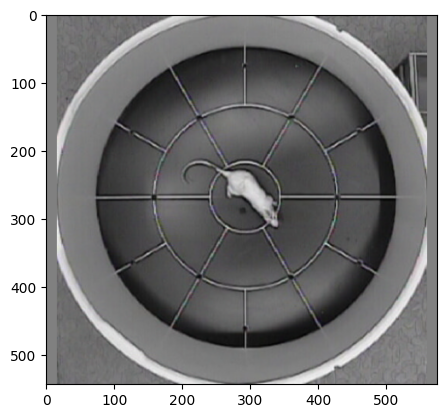

In [ ]:
roberts_cross_v = np.array([[1, 0 ],
                            [0,-1 ]])
roberts_cross_h = np.array([[ 0, 1 ],
                            [ -1, 0 ]])
#pix = cv2.imread("1.dicom.jpeg", 0).astype('float64')

with PIL.Image.open(filename) as pix:
    pix.load()
 
plt.imshow(pix)
b = pix.getbands()  # проверяем, сколько слоев в изображении
print(b)

# преобразуем в серое
pix = pix.convert("L")
 
b = pix.getbands()  # проверяем, сколько слоев в изображении
print(b)


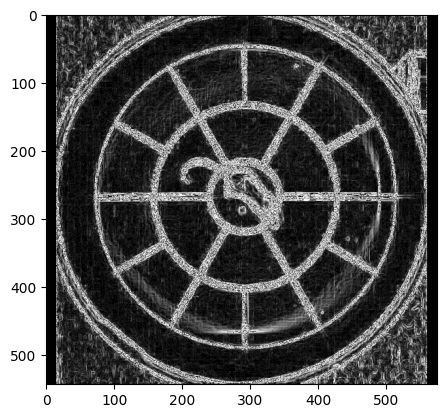

In [ ]:
vertical = ndimage.convolve(pix, roberts_cross_v)
horizontal = ndimage.convolve(pix, roberts_cross_h)
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))

 
PIL_image = PIL.Image.fromarray(np.uint8(edged_img))

plt.imshow(PIL_image,cmap=plt.cm.gray)
PIL_image.save("roberts_test.jpg")

  

### Фильтр Прюитт

Оператор Прюитт используется при обработке изображений, в частности в алгоритмах обнаружения границ. Технически это оператор дискретного дифференцирования, вычисляющий аппроксимацию градиента функции интенсивности изображения. В каждой точке изображения результатом оператора Превитта является либо соответствующий вектор градиента, либо норма этого вектора.

Оператор использует два ядра 3×3, свёртывая исходное изображение для вычисления приближённых значений производных: одно по горизонтали и одно по вертикали. Положим $\mathbf {A}$ исходным изображением, и ${\displaystyle \mathbf {G_{x}} }, {\mathbf  {G_{y}}}$ — двумя изображениями, в которых каждая точка содержит горизонтальное и вертикальное приближение производной, которая рассчитывается как

$$\mathbf {G_{x}} = {\begin{bmatrix}-1&0&+1\\-1&0&+1\\-1&0&+1\end{bmatrix}} * A$$

$$\mathbf {G_{y}} ={\begin{bmatrix}-1&-1&-1\\0&0&0\\+1&+1&+1\end{bmatrix}}*A$$

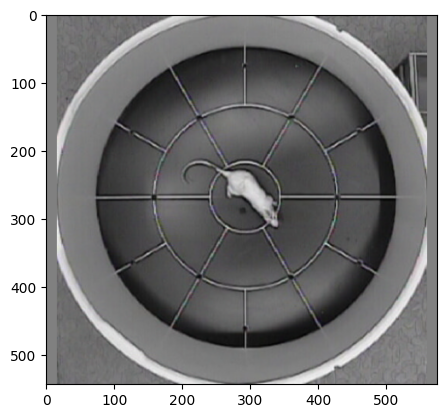

In [ ]:
pic = PIL.Image.open(filename)
pix = np.array(pic)
input_shape = pix.shape
new_shape = input_shape[1], input_shape[0]
result = skimage.filters.prewitt(pix)

# первоначальное изображение
plt.imshow(pic, cmap=plt.cm.gray, aspect='equal')

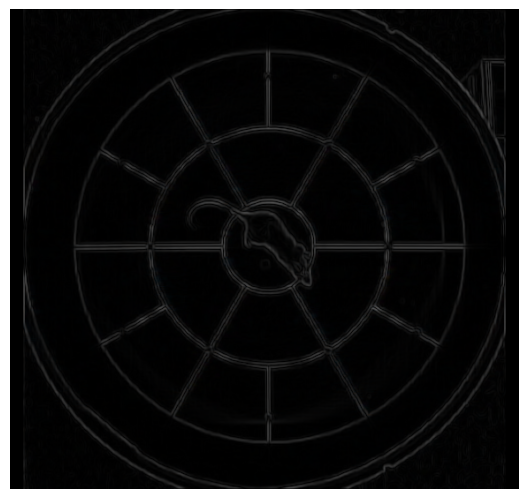

In [ ]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

#измененное изображение
plt.imshow(result, cmap=plt.cm.gray, aspect='equal')


plt.savefig("prewitt_test.jpg", dpi=300)

### Фильтр Собеля

Оператор Собеля — дискретный дифференциальный оператор, вычисляющий приближённое значение градиента яркости изображения.

Строго говоря, оператор использует ядра $3 \times 3$, с которыми сворачивают исходное изображение для вычисления приближённых значений производных по горизонтали и по вертикали. Пусть ${\displaystyle \mathbf {A} }$ — это исходное изображение, а ${\displaystyle \mathbf {G} _{x}}$ и ${\displaystyle \mathbf {G} _{y}}$ — два изображения, на которых каждая точка содержит приближённые производные по ${\displaystyle x}$ и по 
${\displaystyle y}$. Они вычисляются следующим образом: $$\mathbf {G} _{y} = {\begin{bmatrix}+1&+2&+1\\0&0&0\\-1&-2&-1\\\end{bmatrix}}*\mathbf {A}$$ и $$\mathbf {G} _{x}={\begin{bmatrix}-1&0&+1\\-2&0&+2\\-1&0&+1\end{bmatrix}}*\mathbf {A}$$

$*$ - двумерная операция свертки.

Координата ${\displaystyle x}$ здесь возрастает «направо», а ${\displaystyle y}$ — «вниз». В каждой точке изображения приближённое значение величины градиента можно вычислить путём использования полученных приближенных значений производных: ${\mathbf  {G}}={\sqrt  {{{\mathbf  {G}}_{x}}^{2}+{{\mathbf  {G}}_{y}}^{2}}}$ (имеется в виду поэлементно).
Используя эту информацию, мы можем вычислить искомое направление градиента: ${\mathbf  {\Theta }}=\operatorname {arctan}\left({{\mathbf  {G}}_{y} \over {\mathbf  {G}}_{x}}\right)$,

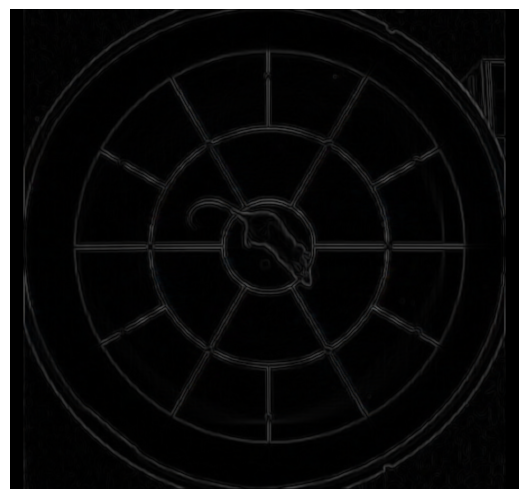

In [ ]:
pic = PIL.Image.open(filename)
pix = np.array(pic)
input_shape = pix.shape
new_shape = input_shape[1], input_shape[0]
result = skimage.filters.sobel(pix)
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(result, cmap=plt.cm.gray, aspect='equal', interpolation="mitchell")
plt.savefig("sobel_test.jpg", dpi=300)

### Фильтр Лапласа

Фильтр Лапласа это очередной фильтр, основанный на принципе нахождения
производных и учитывающий резкие изменения яркости относительно соседних
пикселей.

Однако то, что отличает его от других фильтров, используемых при обработке
изображений для обнаружения границ и выделения признаков, это то, что фильтр
Лапласа "--- это фильтр второго порядка. Когда мы используем производные фильтры
первого порядка, мы должны применять отдельные фильтры для обнаружения
вертикальных и горизонтальных краев (как это было с Прюитт, Собелем и т.д.), а
затем объединять их. Но фильтр Лапласа обнаруживает все края независимо от
направлений.

Математически, фильтр Лапласа определяется как:

$$\Delta^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}$$

Всего существует два вида фильтров Лапласа: положительный и отрицательный.

Положительный оператор Лапласа использует маску, в которой центральный элемент имеет отрицательное значение, а угловые элементы — 0. Этот фильтр идентифицирует внешние края изображения. Пример маски фильтра приведен ниже.

${\begin{bmatrix}0&1&0\\1&-4&1\\0&1&0\\\end{bmatrix}}$

Отрицательный оператор Лапласа используется для поиска внутренних краев изображения. Он использует стандартную маску, в которой центральный элемент имеет положительное значение, углы - $0$, а все остальные элементы - $-1$. Пример приведен ниже.

${\begin{bmatrix}0&-1&0\\-1&4&-1\\0&-1&0\\\end{bmatrix}}$

В обоих случаях сумма значений в фильтре должна быть равна $0$, при этом далеко
необязательно применять конкретные два примера: можно попробовать другие
варианты этих масок.

Пересечение нуля (англ. Zero crossing) — это точка, в которой на графике функции
меняется знак математической функции. При обработке изображений обнаружение края
с использованием фильтра Лапласа происходит путем маркировки точек, которые
приводят к нулю на графике, как потенциальных точек края. Этот метод хорошо
работает на изображениях для поиска краев в обоих направлениях, но плохо
работает, когда на изображении обнаружены шумы. Поэтому обычно изображение
сглаживается, применяя фильтр Гуасса перед фильтром Лапласа. Его часто называют
фильтром Лапласа-Гуасса (LoG).

Мы можем объединить операторы Гаусса и Лапласа вместе, и математическое представление комбинированного фильтра будет следующим:

$$LoG(x, y) = -\frac{1}{\pi \sigma^4} [1 - \frac{x^2 + y^2}{2\sigma^2}] e^{-\frac{x^2 + y^2}{2\sigma^2}}$$

In [ ]:
def LoG_filter(image, sigma, size=None):
    # ядро LoG
    if size is None:
        size = int(6 * sigma + 1) if sigma >= 1 else 7

    if size % 2 == 0:
        size += 1

    x, y = np.meshgrid(np.arange(-size//2+1, size//2+1), np.arange(- size // 2 + 1, size // 2 + 1))
    kernel = -(1/(np.pi * sigma**4)) * (1 - ((x**2 + y**2) / (2 * sigma**2))) * np.exp(- (x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / np.sum(np.abs(kernel))

    result = ndimage.convolve(image, kernel)
    return result

image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
sigma = 2.0
filtered_image = LoG_filter(image, sigma)

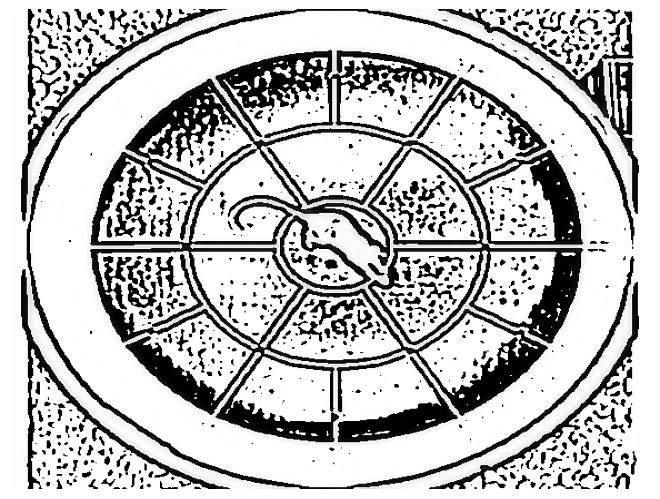

In [ ]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(filtered_image, cmap=plt.cm.gray, aspect='auto')
plt.savefig("log_test.jpg", dpi=300)

## Выделение областей

### MeanShift

MeanShift - алгоритм кластеризации на основе центроид, который работает путем
обновления кандидатов на центроиды, чтобы они были средними точками в заданной
области. Затем эти кандидаты фильтруются на этапе постобработки, чтобы исключить
почти дубликаты и сформировать окончательный набор центроид.

Сдвиг среднего значения (англ. MeanShift) является процедурой для определения
местоположения максимумов (мод) плотности вероятности, задаваемой дискретной
выборкой по этой функции. Метод является итеративным, и мы начинаем с начальной
оценки $x$.

Пусть будет задана ядерная функция ${\displaystyle K(x_{i}-x)}$. Эта функция
определяет вес ближайших точек для переоценки среднего. Обычно используется
гауссово ядро от расстояния до текущей оценки ${\displaystyle
K(x_{i}-x)=e^{-c||x_{i}-x||^{2}}}$. Взвешенное среднее плотности в окне,
определённом функцией $K$ равно $${\displaystyle m(x)={\frac {\sum _{x_{i}\in
N(x)}K(x_{i}-x)x_{i}}{\sum _{x_{i}\in N(x)}K(x_{i}-x)}}}$$ где $N(x)$ является
окрестностью точки $x$, то есть набором точек, для которых ${\displaystyle
K(x_{i})\neq 0}$.

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

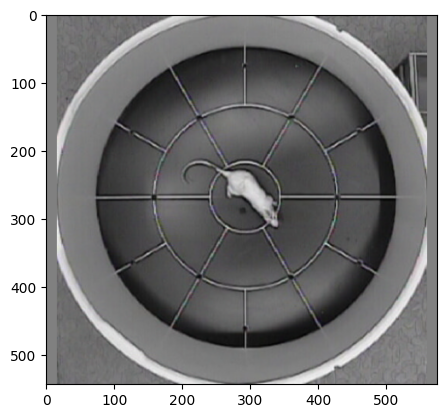

In [ ]:
image = PIL.Image.open(filename).convert('RGB')

plt.imshow(image, cmap=plt.cm.gray, aspect='equal')


img = np.array(image)
shape = img.shape
new_shape = shape[1], shape[0]
reshaped_image = np.reshape(image, [-1, 3])
bandwidth = estimate_bandwidth(reshaped_image, quantile=0.1, n_samples=300)

msc = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msc.fit(reshaped_image)

labels = msc.labels_
result_image = np.reshape(labels, shape[:2])

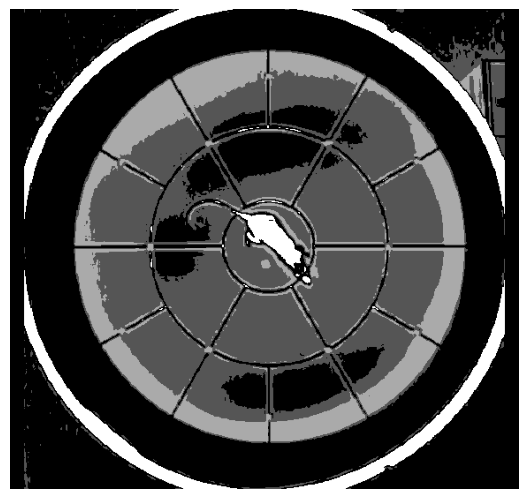

In [ ]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

plt.imshow(result_image, cmap=plt.cm.gray, aspect='equal')
plt.savefig("meanshift_test.jpg", dpi=300)

### Floodfill

Алгоритм заполнения позволяет выбирать наборы точек, однородные по цвету. Для
этого необходимо выбрать исходный пиксель и задать интервал изменения цвета
соседних пикселей относительно исходного (определенное пороговое значение
разницы между яркостью соседнего и исходного пикселей, меньше которого соседний
пиксель окрашивается в цвет исходного).

img: изображение, которое нужно залить

mask: mask layer. Используйте маску, чтобы указать область, в которой используется алгоритм. Если он используется для полного изображения, размер маскирующего слоя равен числу строк в исходном изображении + 2 и количеству столбцов + 2. 
Размер матрицы 0, край окружности будет установлен в 1 при использовании алгоритма. Только положение, соответствующее 0 на слое маски, может быть залито, поэтому слой маски инициализируется в матрицу 0. [dtype:np.uint8】

seed: это начальная точка алгоритма затопления, которая также основана на оценке пикселей этой точки, чтобы определить, затоплены ли пиксельные точки с похожими цветами.

newvalue: это новое присвоенное значение (B, G, R) для затопленной области

(loDiff1, loDiff2, loDiff3): это значение пикселя, которое можно уменьшить относительно пикселя начальной точки, то есть начального значения (B0, G0, R0), а нижняя граница области затопления равна (B0-loDiff1, G0-loDiff2, R0-loDiff3)

(upDiff1, upDiff2, upDiff3): это значение пикселя, которое может быть направлено вверх относительно начальной точки, то есть начальное значение (B0, G0, R0), верхний предел области затопления равно (B0 + upDiff1, G0 + upDiff2, R0 + upDiff3 )

флаг: режим обработки алгоритма затопления.

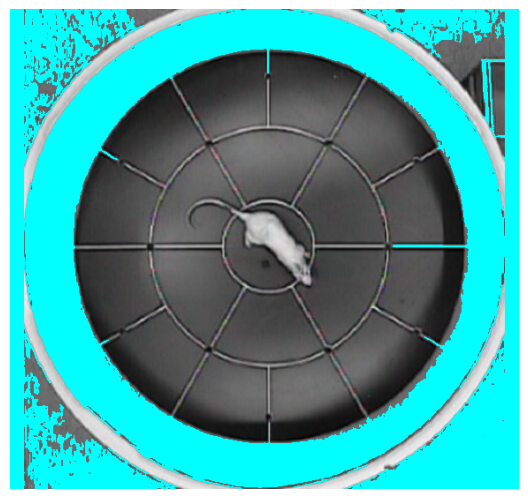

In [ ]:
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

copyimg = img.copy()
h, w = copyimg.shape[:2]
mask = np.zeros([h + 2, w + 2], np.uint8)

# нужно задать координаты точек - центров заливки. Без этого работать не будет!

cv2.floodFill(copyimg, mask, (165,60), (0, 255, 255), (50, 20, 50), (50, 50 ,30), cv2.FLOODFILL_FIXED_RANGE)

fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(copyimg)
plt.savefig("floodfill_test.jpg", dpi=300)

Однако далеко не всегда удается удачно подобрать исходные для заливки пиксели.
Поэтому, чтобы не заниматься выбором исходного пикселя, достаточно применять
преобразование изображения с помощью метода cv2.threshold

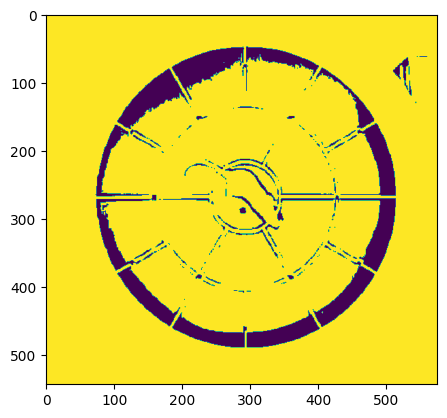

In [ ]:
image = cv2.imread(filename)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

lower_bound = 50
upper_bound = 50

(thresh, BnW_image) = cv2.threshold(gray_image, lower_bound, upper_bound, cv2.THRESH_BINARY)
im = PIL.Image.fromarray(BnW_image)
im.save("threshold_test.jpg")
plt.imshow(im)

## Зашумление и удаление шумов

Лучший способ добавить шум к данным — это случайно изменить значения точек
данных. Можно выбрать некоторые точки данных в случайных местах и изменить их
значения на случайную величину. При этом можно контролировать количество точек
данных, которые нужно изменить, и степень изменения. Добавление шума к данным и
контроль над ним могут быть достигнуты с помощью нескольких методов добавления
шума:

1. Гауссов шум
2. Импульсный шум.
3. Шум соли и перца
4. Шум квантования


### Гауссов шум

Гауссов шум это по сути просто (опять) распределение Гаусса. Когда он
добавляется к данным, его называют шумом, вызывая искажение данных. Этот шум
широко используется по следующим причинам:

1. Он имеет хорошо изученные свойства и полностью определяется своим средним
   значением и стандартным отклонением, поэтому над ним можно добиться хорошего
   контроля и предсказуемости.

2. Большинство шумов, встречающихся в природе, напоминают гауссов шум, что
делает его идеальным выбором для моделирования.

3. Простота формирования

In [ ]:
# здесь представлен пример формирования шума на сером изображении, пример на
# цветном будет ниже

img = cv2.imread(filename)
img_gray = img[:,:,1]
noise = np.random.normal(0, 50, img_gray.shape) 
img_noised = img_gray + noise
img_noised = np.clip(img_noised, 0, 255).astype(np.uint8)

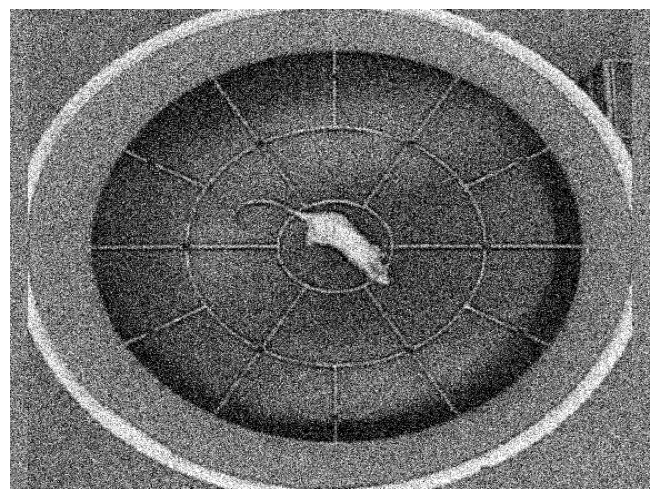

In [ ]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(img_noised, cmap=plt.cm.gray, aspect='auto')
plt.savefig("gauss_noise_test.jpg", dpi=300)

### Импульсный шум

Импульсный шум — это, по сути, внезапное увеличение или уменьшение значений
данных. Добавление такого шума может имитировать реальные данные, которые обычно имеют несколько всплесков в случайных местах. Эти пики также называют выбросами. Вы можете добавить импульсный шум, просто увеличивая или уменьшая значения данных в нескольких случайных местах данных.

In [ ]:
x = np.arange(0, 360, 1)
y = np.sin(np.deg2rad(x))

noise_sample = np.random.default_rng().uniform(0.2*min(y), 0.3*max(y), int(0.03*len(y)))
zeros = np.zeros(len(y) - len(noise_sample))
noise = np.concatenate([noise_sample, zeros])
np.random.shuffle(noise)
y_noised = y + noise

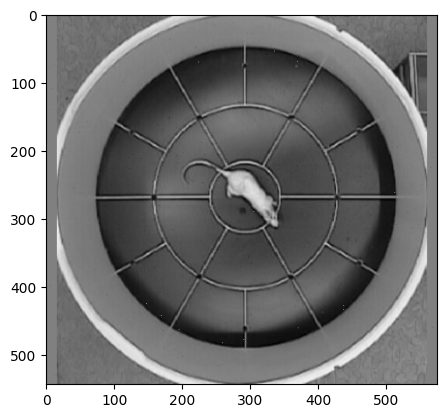

In [ ]:
image = cv2.imread(filename)
 
h, w = image.shape[:2]

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

s = 300  # количество точек - шума

noise_sample = np.random.default_rng().uniform(low=200, high=250, size=s)
 
rs1 = np.random.randint(0,gray.size/h-1,s)
rs2 = np.random.randint(0,gray.size/w-1,s)

j = 0

# добавляем шум
for i in noise_sample:
    gray[rs2[j]][rs1[j]] += i
    j += 1
 
plt.imshow(gray, cmap=plt.cm.gray, aspect='equal')

### Шум соли и перца (Salt-and-Pepper)

Шум соли и перца — это тип импульсного шума, в котором случайные точки
данных заменяются минимальными или максимальными значениями данных. Этот тип
шума естественным образом возникает в данных изображения, вызванный
неисправностями датчика или повреждением данных во время хранения или передачи
данных, и, таким образом, этот шум может имитировать отсутствующую или
поврежденную информацию.

In [ ]:
img_size = img_gray.size
noise_percentage = 0.1
noise_size = int(noise_percentage*img_size)

random_indices = np.random.choice(img_size, noise_size)
img_noised = img_gray.copy()
noise = np.random.choice([img_gray.min(), img_gray.max()], noise_size)
img_noised.flat[random_indices] = noise

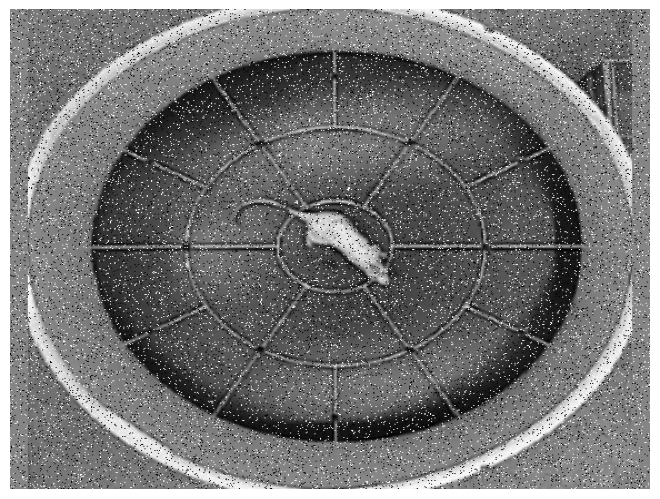

In [ ]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(img_noised, cmap=plt.cm.gray, aspect='auto')
plt.savefig("saltnpepper_test.jpg", dpi=300)

### Шум квантования

Это тип шума, при котором некоторые случайные значения непрерывной переменной представлены дискретными значениями, что приводит к снижению точности этих значений.

Например, рассмотрим следующий набор данных, содержащий непрерывные значения:

$[1.22, 4.35, 6.30, 8.01, 10.44…]$

Когда к этим данным добавляется шум квантования, некоторые из его значений
станут дискретными.

$[1.22, \textit{4}, 6.30, 8.01, \textit{10}, \dots]$

Эти дискретизированные значения представляют собой шум. Один из самых простых
способов добавить этот шум к вашим данным — просто округлить некоторые случайные значения в данных.

In [ ]:
# Генерация исходного сигнала-примера
x = np.arange(0, 100, 2)
y = 0.3 * x + 0.6

# Генерация шума
y_size = len(y)
noise_percentage = 0.2
noise_size = int(noise_percentage * y_size)
random_indices = np.random.choice(y_size, noise_size)
y_noised = y.copy()
y_noised[random_indices] = np.rint(y_noised[random_indices])

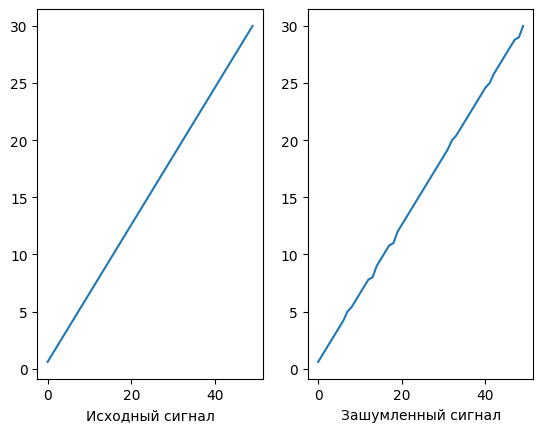

In [ ]:
plt.subplot(121)
plt.plot(y)
plt.xlabel("Исходный сигнал")
plt.subplot(122)
plt.plot(y_noised)
plt.xlabel("Зашумленный сигнал")
plt.show()

### Удаление шума из изображения и видео

Существует множество методов сглаживания изображений, таких как размытие по
Гауссу, медианное размытие и т. д. Их иногда принято использовать для удаления
небольшого количества шума. В них берется небольшая окрестность вокруг
зашумленного пикселя и выполняется особая операция (средневзвешенное по Гауссу,
медиана значений и т. д.), чтобы заменить центральный элемент. Таким образом,
удаление шума в пикселе происходит в этих алгоритмах локально по отношению к его
окрестностям.

Также можно использовать параметры шума. Рассмотрим зашумленный пиксель, $p =
p_0 + n$, где $p_0$ — истинное значение пикселя, а $n$ — шум в этом пикселе.
Можно взять большое количество одинаковых пикселей (скажем, $N$) из разных
изображений и вычислить их среднее значение. Тогда в идеале можно получить $p = p_0$,
поскольку среднее значение шума равно нулю.

Библиотека OpenCV обладает четырьмя функциями удаления шума:

* cv.fastNlMeansDenoising() - работает с изображениями в градациях серого
* cv.fastNlMeansDenoisingColored() - работает с цветными изображениями
* cv.fastNlMeansDenoisingMulti() - работает с рядом изображений, полученных за небольшой промежуток времени
* cv.fastNlMeansDenoisingColoredMulti() - то же, что выше, только для цветных изображений

#### cv.fastNlMeansDenoising()

Аргументы:

* h: параметр, определяющий силу фильтра. Более высокое значение h лучше удаляет шум, но также удаляет больше деталей изображения.
* hForColorComponents: то же, что и h, но только для цветных изображений

In [ ]:
img = cv2.imread('gauss_noise_test.jpg')
dst = cv2.fastNlMeansDenoisingColored(img, None, 25)

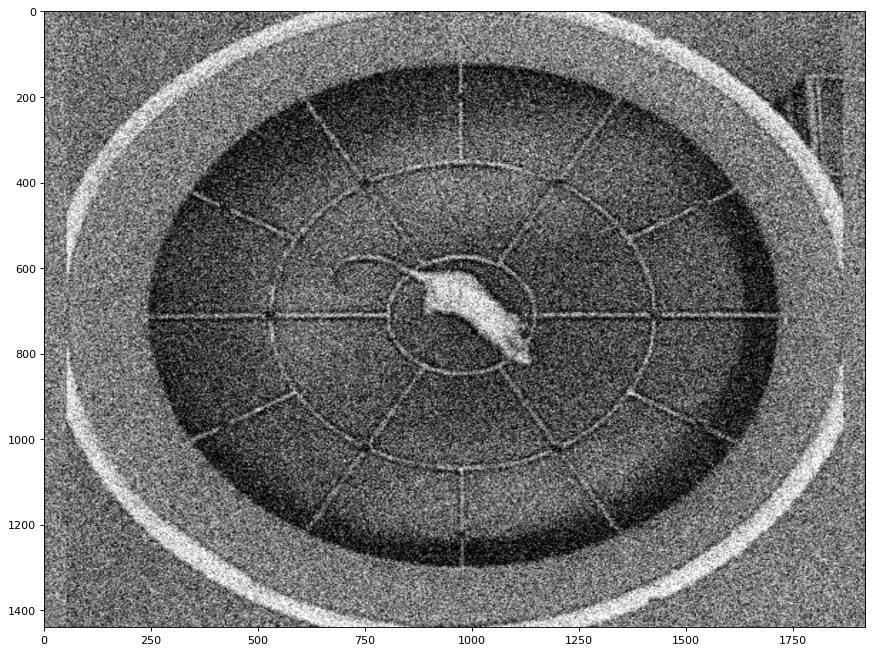

In [ ]:
plt.figure(figsize=(14, 10), dpi=80)
plt.imshow(img)

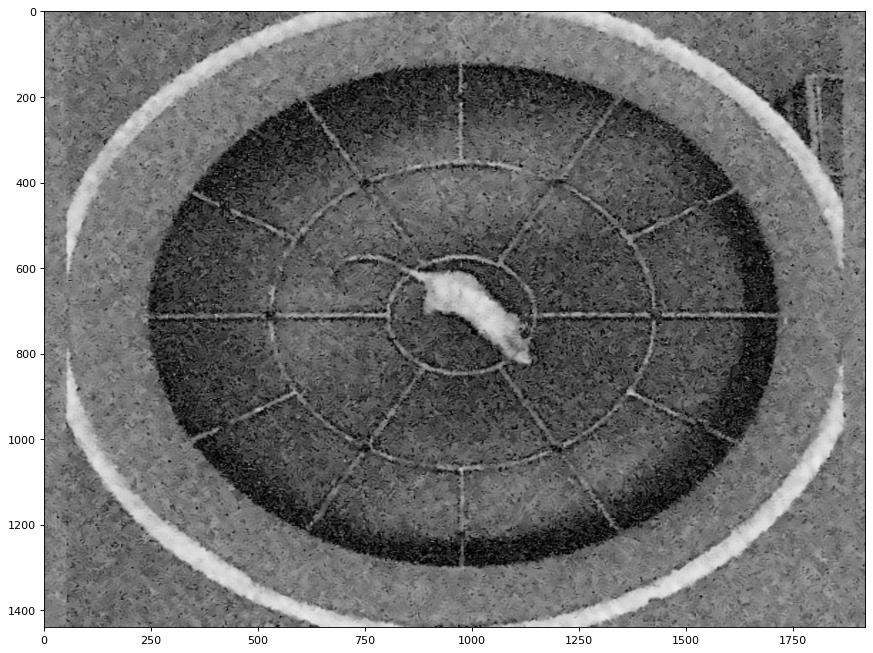

In [ ]:
plt.figure(figsize=(14, 10), dpi=80)
plt.imshow(dst)

#### cv.fastNlMeansDenoisingColored()

<Figure size 1200x1200 with 0 Axes>

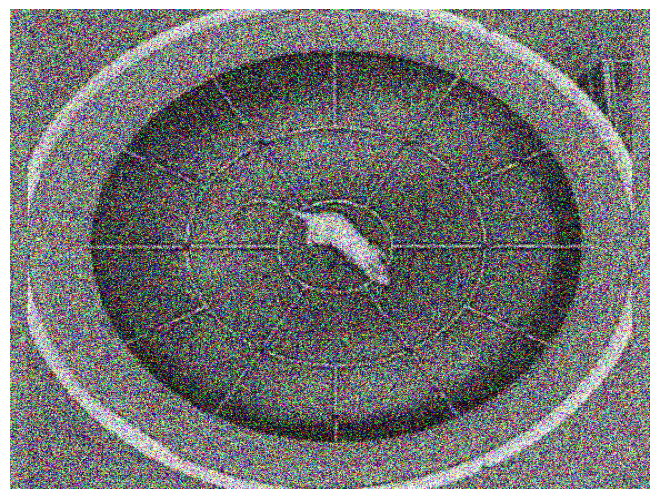

In [ ]:
# добавляем шумы и сохраняем

img = cv2.imread(filename)[...,::-1] / 255.0
noise = np.random.normal(loc=0, scale=1, size=img.shape)
noisy = np.clip((img + noise * 0.2), 0,1)
noisy2 = np.clip((img + noise * 0.4), 0,1)

plt.figure(figsize=(12, 12))
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(noisy2, aspect='auto')
plt.savefig("noised_kisa.jpg", dpi=300)

In [ ]:
img = cv2.imread('noised_kisa.jpg')
dst = cv2.fastNlMeansDenoisingColored(img, None, 15, 10, 7, 21)

<Figure size 1200x1200 with 0 Axes>

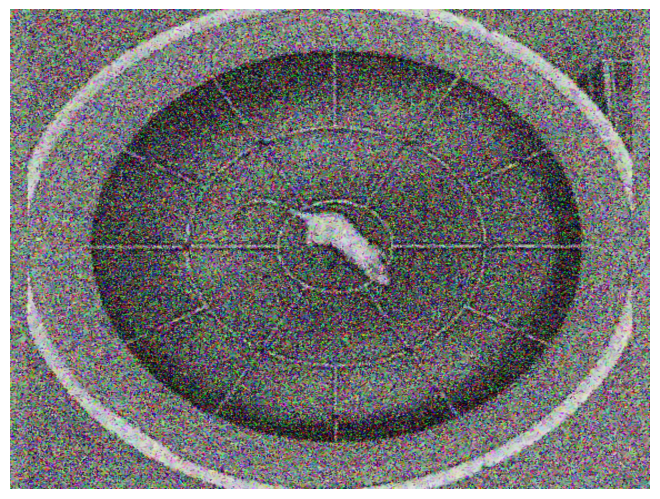

In [ ]:
plt.figure(figsize=(12, 12))
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(dst[...,::-1] / 255.0, aspect='auto')
plt.savefig("denoised_kisa.jpg", dpi=300)

## Классификация

### модели ResNet

Как/почему модели ResNet работают?


С момента появления сверточных сетей (CNN) в 2012 году предпринимались серьезные попытки создать более глубокие сверточные нейронные сети, поскольку считается, что качество модели тесно связана со сложностью сети. Основным препятствием в обучении более глубоких нейронных сетей является хорошо известная проблема исчезающего градиента. По мере добавления слоев в сеть умножающиеся градиенты делают общий градиент бесконечно малым, что, в свою очередь, приводит к очень медленной сходимости, если вообще сеть сходится.

Также могут возникнуть трудности обучения, связанные с взрывными градиентами, когда слои в нейронных сетях складываются друг в друга. 

В попытке справиться с исчезающими/взрывающимися градиентами в более глубоких сетях в 2015 году была представлена новая архитектура CNN, которая выиграла соревнование по классификации ImageNet в ILSVRC 2015 с большим отрывом (2,84 %) от своих конкурентов.

Основная идея, которая привела к архитектуре ResNet довольно проста: если предположить, что модуль нейронной сети может асимптотически изучить любую функцию, то он также может изучить и функцию identity. 

То есть, мы можем добавить уровни (identity layers), которые просто пропускают сигнал дальше без изменения. То есть мы можем переформулировать задачу так, чтобы более глубокие уровни предсказывали разницу между тем, что выдают предыдущие слои, и таргетом.  То есть всегда могли увести веса в 0 и просто пропустить сигнал. Отсюда название — Deep Residual Learning, то есть обучаемся предсказывать отклонения от прошлых лееров.

Базовый блок resnet выглядит следующим образом:

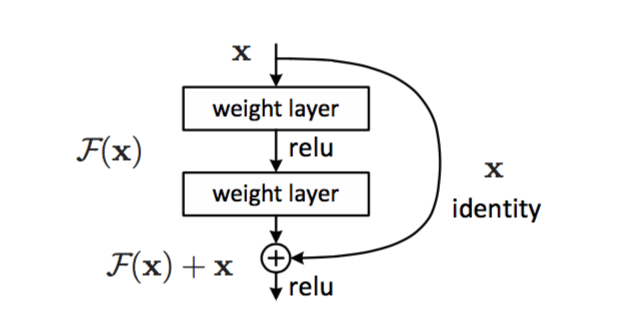 

 
Входные данные для остаточного блока — X, а выходные — F(X)+X, поэтому при обучении F(X)=0 этот базовый блок обходит во время процесса обучения, что эквивалентно сопоставлению идентичности.

 Каскад этих остаточных блоков используется для создания очень глубоких моделей CNN с более чем 100 слоями.

 Два слоя с весами (могут быть по-сути любыми. В том числе и сверточными), и shortcut connection, который просто пропускает сигнал дальше (identity). Результат после двух лееров добавляется к этому identity.  Поэтому если в весах некого уровня будет везде 0, он просто пропустит дальше чистый сигнал.

 Заметим, что слоев в блоке может бытть и более двух, и они не обязаны быть одинаковыми.
 Вообще, как лучше прокидывать shortcut connection, является вопросом до сих пор активно изучающимся.

 ЗЫ Фактически мы можем рассматривать ResNet как ансамбль нейросетей.

In [ ]:
!pip install pandas


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow
import torch

from tensorflow import keras
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

from PIL import Image

import os
import random
import pandas as pd
import torchvision
import numpy as np

In [44]:
# import os
# import random
# import shutil

# # Путь к папке, содержащей папки с изображениями
# root_directory = 'C:/Users/naida/Desktop/ML PSU/images'

# # Проход по каждой папке в root_directory
# for foldername in os.listdir(root_directory):
#     folderpath = os.path.join(root_directory, foldername)
#     if os.path.isdir(folderpath):
#         image_files = os.listdir(folderpath)
#         random.shuffle(image_files)  # Перемешиваем список файлов
#         num_images_to_keep = int(0.3 * len(image_files))  # Оставляем 70% изображений
        
#         # Удаляем лишние изображения
#         for filename in image_files[num_images_to_keep:]:
#             os.remove(os.path.join(folderpath, filename))

# print("Процесс удаления лишних изображений завершен.")


Процесс удаления лишних изображений завершен.


In [45]:
# import os
# import shutil
# import random

# # Путь к папке, где лежат папки с категориями товаров
# data_dir = r"C:/Users/naida\Desktop/ML PSU/images"
# train_dir = r"C:/Users/naida\Desktop/ML PSU/train"
# test_dir = r"C:/Users/naida/Desktop/ML PSU/test"
# val_dir = r"C:/Users/naida\Desktop/ML PSU/val"

# # Разделение данных на тренировочный, тестовый и валидационный наборы
# for category in os.listdir(data_dir):
#     category_path = os.path.join(data_dir, category)
    
#     # Создание директорий для каждой категории в тренировочном, тестовом и валидационном наборах
#     os.makedirs(os.path.join(train_dir, category), exist_ok=True)
#     os.makedirs(os.path.join(test_dir, category), exist_ok=True)
#     os.makedirs(os.path.join(val_dir, category), exist_ok=True)
    
#     # Получение списка файлов изображений в папке категории
#     files = os.listdir(category_path)
#     random.shuffle(files)  # Перемешивание файлов для случайного разделения
    
#     # Разделение файлов на тренировочный (70%), тестовый (15%) и валидационный (15%) наборы
#     split_idx1 = int(0.7 * len(files))
#     split_idx2 = int(0.85 * len(files))
    
#     train_files = files[:split_idx1]
#     test_files = files[split_idx1:split_idx2]
#     val_files = files[split_idx2:]
    
#     # Копирование файлов в соответствующие директории
#     for file in train_files:
#         shutil.copy(os.path.join(category_path, file), os.path.join(train_dir, category, file))
    
#     for file in test_files:
#         shutil.copy(os.path.join(category_path, file), os.path.join(test_dir, category, file))
    
#     for file in val_files:
#         shutil.copy(os.path.join(category_path, file), os.path.join(val_dir, category, file))



In [87]:
import os


In [4]:
# import os
# import shutil

# # Путь к директории, которую хотим проанализировать
# directory = r'C:\Users\naida\Desktop\ML PSU\images'

# # Создаем список кортежей (размер папки, имя папки)
# folders = [(os.path.getsize(os.path.join(directory, f)), f) for f in os.listdir(directory) if os.path.isdir(os.path.join(directory, f))]

# # Сортируем список по размеру папок и получаем топ 5
# top_5_folders = sorted(folders, reverse=True)[:5]

# print("Топ 5 папок по размеру:")
# for size, folder in top_5_folders:
#     print(f"Папка: {folder}, Размер: {size} байт")

# # Удаляем остальные папки
# for size, folder in folders:
#     if (size, folder) not in top_5_folders:
#         shutil.rmtree(os.path.join(directory, folder))
#         print(f"Папка {folder} удалена.")

# print("Папки, не вошедшие в топ 5, удалены.")


Топ 5 папок по размеру:
Папка: Topwear, Размер: 3407872 байт
Папка: Shoes, Размер: 1835008 байт
Папка: Bags, Размер: 786432 байт
Папка: Watches, Размер: 655360 байт
Папка: Bottomwear, Размер: 655360 байт
Папка Accessories удалена.
Папка Apparel Set удалена.
Папка Bath and Body удалена.
Папка Beauty Accessories удалена.
Папка Belts удалена.
Папка Cufflinks удалена.
Папка Dress удалена.
Папка Eyes удалена.
Папка Eyewear удалена.
Папка Flip Flops удалена.
Папка Fragrance удалена.
Папка Free Gifts удалена.
Папка Gloves удалена.
Папка Hair удалена.
Папка Headwear удалена.
Папка Innerwear удалена.
Папка Jewellery удалена.
Папка Lips удалена.
Папка Loungewear and Nightwear удалена.
Папка Makeup удалена.
Папка Mufflers удалена.
Папка Nails удалена.
Папка Perfumes удалена.
Папка Sandal удалена.
Папка Saree удалена.
Папка Scarves удалена.
Папка Shoe Accessories удалена.
Папка Skin удалена.
Папка Skin Care удалена.
Папка Socks удалена.
Папка Sports Accessories удалена.
Папка Sports Equipment удал

In [23]:
import os
from PIL import Image

folder_path = "C:/Users/naida/Desktop/ML PSU/test"
test_dataset = []

for category in os.listdir(folder_path):
    print(category)
    category_path = os.path.join(folder_path, category)
    if os.path.isdir(category_path):
        for file in os.listdir(category_path):
            image_path = os.path.join(category_path, file)
            print(image_path)
            img = Image.open(image_path)
            new_size = (128,128)
            img_resized = img.resize(new_size)
            img_res_copy = img_resized.copy()
            test_dataset.append((img_res_copy, category))

print(len(test_dataset))


Bags
C:/Users/naida/Desktop/ML PSU/test\Bags\10202.jpg
C:/Users/naida/Desktop/ML PSU/test\Bags\10210.jpg
C:/Users/naida/Desktop/ML PSU/test\Bags\10223.jpg
C:/Users/naida/Desktop/ML PSU/test\Bags\10225.jpg
C:/Users/naida/Desktop/ML PSU/test\Bags\10321.jpg
C:/Users/naida/Desktop/ML PSU/test\Bags\10774.jpg
C:/Users/naida/Desktop/ML PSU/test\Bags\15665.jpg
C:/Users/naida/Desktop/ML PSU/test\Bags\17136.jpg
C:/Users/naida/Desktop/ML PSU/test\Bags\19313.jpg
C:/Users/naida/Desktop/ML PSU/test\Bags\20529.jpg
C:/Users/naida/Desktop/ML PSU/test\Bags\21488.jpg
C:/Users/naida/Desktop/ML PSU/test\Bags\21960.jpg
C:/Users/naida/Desktop/ML PSU/test\Bags\22006.jpg
C:/Users/naida/Desktop/ML PSU/test\Bags\22653.jpg
C:/Users/naida/Desktop/ML PSU/test\Bags\22659.jpg
C:/Users/naida/Desktop/ML PSU/test\Bags\25158.jpg
C:/Users/naida/Desktop/ML PSU/test\Bags\25177.jpg
C:/Users/naida/Desktop/ML PSU/test\Bags\25188.jpg
C:/Users/naida/Desktop/ML PSU/test\Bags\2653.jpg
C:/Users/naida/Desktop/ML PSU/test\Bags\27038.

In [24]:
import os
from PIL import Image

folder_path = "C:/Users/naida/Desktop/ML PSU/train"
train_dataset = []

for category in os.listdir(folder_path):
    category_path = os.path.join(folder_path, category)
    print(category)
    for file in os.listdir(category_path):
        image_path = os.path.join(category_path, file)
        print(image_path)
        img = Image.open(image_path)
        new_size = (128, 128)
        img_resized = img.resize(new_size)
        img_res_copy = img_resized.copy()
        train_dataset.append((img_res_copy, category))

print(len(train_dataset))


Bags
C:/Users/naida/Desktop/ML PSU/train\Bags\10198.jpg
C:/Users/naida/Desktop/ML PSU/train\Bags\10211.jpg
C:/Users/naida/Desktop/ML PSU/train\Bags\10246.jpg
C:/Users/naida/Desktop/ML PSU/train\Bags\10323.jpg
C:/Users/naida/Desktop/ML PSU/train\Bags\12743.jpg
C:/Users/naida/Desktop/ML PSU/train\Bags\14796.jpg
C:/Users/naida/Desktop/ML PSU/train\Bags\14878.jpg
C:/Users/naida/Desktop/ML PSU/train\Bags\15214.jpg
C:/Users/naida/Desktop/ML PSU/train\Bags\15442.jpg
C:/Users/naida/Desktop/ML PSU/train\Bags\15660.jpg
C:/Users/naida/Desktop/ML PSU/train\Bags\15708.jpg
C:/Users/naida/Desktop/ML PSU/train\Bags\1598.jpg
C:/Users/naida/Desktop/ML PSU/train\Bags\16744.jpg
C:/Users/naida/Desktop/ML PSU/train\Bags\16754.jpg
C:/Users/naida/Desktop/ML PSU/train\Bags\16755.jpg
C:/Users/naida/Desktop/ML PSU/train\Bags\16765.jpg
C:/Users/naida/Desktop/ML PSU/train\Bags\17115.jpg
C:/Users/naida/Desktop/ML PSU/train\Bags\17123.jpg
C:/Users/naida/Desktop/ML PSU/train\Bags\18029.jpg
C:/Users/naida/Desktop/ML P

In [25]:
import os
from PIL import Image

folder_path = "C:/Users/naida/Desktop/ML PSU/val"
validate_dataset = []

for category in os.listdir(folder_path):
    category_path = os.path.join(folder_path, category)
    if os.path.isdir(category_path):
        for file in os.listdir(category_path):
            image_path = os.path.join(category_path, file)
            if os.path.isfile(image_path):
                img = Image.open(image_path)
                new_size = (128, 128)
                img_resized = img.resize(new_size)
                img_res_copy = img_resized.copy()
                validate_dataset.append((img_res_copy, category))

print(len(validate_dataset))


686


In [26]:
compose = transforms.Compose([transforms.PILToTensor()])

for i in range(len(test_dataset)):
    test_dataset[i] = (compose(test_dataset[i][0]), test_dataset[i][1])

for i in range(len(train_dataset)):
    train_dataset[i] = (compose(train_dataset[i][0]), train_dataset[i][1])

for i in range(len(validate_dataset)):
    validate_dataset[i] = (compose(validate_dataset[i][0]), validate_dataset[i][1])

random.shuffle(train_dataset)

random.shuffle(validate_dataset)

In [27]:

test_df = pd.DataFrame(test_dataset)
train_df = pd.DataFrame(train_dataset)
val_df = pd.DataFrame(validate_dataset)

In [29]:
# Setting Training Hyperparameters 
batch_size = 32  # original ResNet paper uses batch_size = 128 for training 
epochs = 200
data_augmentation = True
num_classes = 10
lr = 1e-04
  
# Data Preprocessing  
subtract_pixel_mean = True
n = 3
  
depth = n * 9 + 2
  
# Model name, depth and version 
model_type = f'ResNet {depth}' 

test_loader = torch.utils.data.DataLoader(
        test_df,
        batch_size=batch_size, shuffle=True,
        num_workers=4, pin_memory=True)

train_loader = torch.utils.data.DataLoader(
        train_df,
        batch_size=batch_size, shuffle=True,
        num_workers=4, pin_memory=True)

val_loader = torch.utils.data.DataLoader(
        val_df,
        batch_size=batch_size, shuffle=False,
        num_workers=4, pin_memory=True)
  

In [30]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

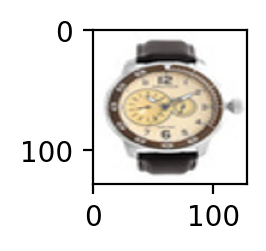

In [31]:
images, labels = train_dataset[0], train_dataset[1]

# Check and filter out non-tensor elements
images = [img for img in images if isinstance(img, torch.Tensor)]

# Convert filtered images to a tensor
images_tensor = torch.stack(images[0:8])

plt.figure(figsize=(10, 1))
imshow(torchvision.utils.make_grid(images_tensor))

In [39]:
def split_to_x_y(dataset):
    x_ = []
    y_ = []
 
    for i in range(len(dataset)):
        if torch.transpose(dataset[0][i], 0, 2).shape == (128, 128, 3):  # Проверяем форму массива
            x_.append(torch.transpose(dataset[0][i], 0, 2))
            y_.append(dataset[1][i])
      
    if len(x_) != len(y_):
        raise ValueError("Количество образцов в x и y не совпадает")

    return x_, y_


In [40]:
x_train, y_train = split_to_x_y(train_loader.dataset)
x_test, y_test = split_to_x_y(test_loader.dataset)

In [41]:
train_df[1].unique()

array(['Watches', 'Shoes', 'Topwear', 'Bottomwear', 'Bags'], dtype=object)

In [42]:
sizes = set()
for item in x_test:
    size = item.shape
    sizes.add(size)

if len(sizes) == 1:
    print("Все тензоры в x_train имеют одинаковую размерность:", sizes)
else:
    print("Тензоры в x_train имеют разные размерности:", sizes)


Все тензоры в x_train имеют одинаковую размерность: {torch.Size([128, 128, 3])}


In [43]:
import numpy as np
import keras


Xtrain = np.array(x_train)
Ytrain = np.array(y_train)

Xtest = np.array( x_test)
Ytest = np.array(y_test)

label_mapping = {
    'Topwear': 0,
    'Bags': 1,
    'Shoes': 2,
    'Watches': 3,
    'Bottomwear': 4
}

# Преобразование строковых меток в числа
Ytrain_numeric = np.array([label_mapping[label] for label in Ytrain])
Ytest_numeric = np.array([label_mapping[label] for label in Ytest])

# Теперь преобразуем в категориальные метки
Ytrain = keras.utils.to_categorical(Ytrain_numeric, num_classes=5)
Ytest = keras.utils.to_categorical(Ytest_numeric, num_classes=5)


In [44]:
input_shape = Xtrain.shape[1:]
input_shape

(128, 128, 3)

In [45]:
# архитектура игрушечной ResNet
inputs = keras.Input(shape=(128, 128, 3), name="img")

x = keras.layers.Conv2D(32, 3, activation="relu")(inputs)
x = keras.layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = keras.layers.MaxPooling2D(3)(x)

x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = keras.layers.add([x, block_1_output])

x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = keras.layers.add([x, block_2_output])

x = keras.layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(256, activation="relu")(x)
x =keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(5, activation='softmax')(x)
model = keras.Model(inputs, outputs, name="toy_resnet")

In [48]:
print(Xtrain.shape)
print(Ytrain.shape)

print(Xtest.shape)
print(Ytest.shape)

(3170, 128, 128, 3)
(3170, 5)
(674, 128, 128, 3)
(674, 5)


In [49]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(Xtrain, Ytrain, batch_size=16, epochs=10, validation_split=0.2)
print(model.evaluate(Xtest, Ytest))


Epoch 1/10


159/159 [==============================] - 203s 1s/step - loss: 2.6864 - accuracy: 0.5264 - val_loss: 1.0371 - val_accuracy: 0.6420
Epoch 2/10
159/159 [==============================] - 199s 1s/step - loss: 0.9021 - accuracy: 0.7192 - val_loss: 3.5558 - val_accuracy: 0.4921
Epoch 3/10
159/159 [==============================] - 188s 1s/step - loss: 0.6800 - accuracy: 0.7780 - val_loss: 0.4067 - val_accuracy: 0.8502
Epoch 4/10
159/159 [==============================] - 189s 1s/step - loss: 0.4926 - accuracy: 0.8371 - val_loss: 0.3700 - val_accuracy: 0.8644
Epoch 5/10
159/159 [==============================] - 188s 1s/step - loss: 0.3586 - accuracy: 0.8778 - val_loss: 0.3471 - val_accuracy: 0.8912
Epoch 6/10
159/159 [==============================] - 187s 1s/step - loss: 0.3184 - accuracy: 0.8967 - val_loss: 0.3700 - val_accuracy: 0.8612
Epoch 7/10
159/159 [==============================] - 181s 1s/step - loss: 0.2730 - accuracy: 0.9077 - val_loss: 0.5226 - val_accuracy: 0.8

1/1 [==============================] - 0s 123ms/step
предсказанный класс 3, реальный класс 3


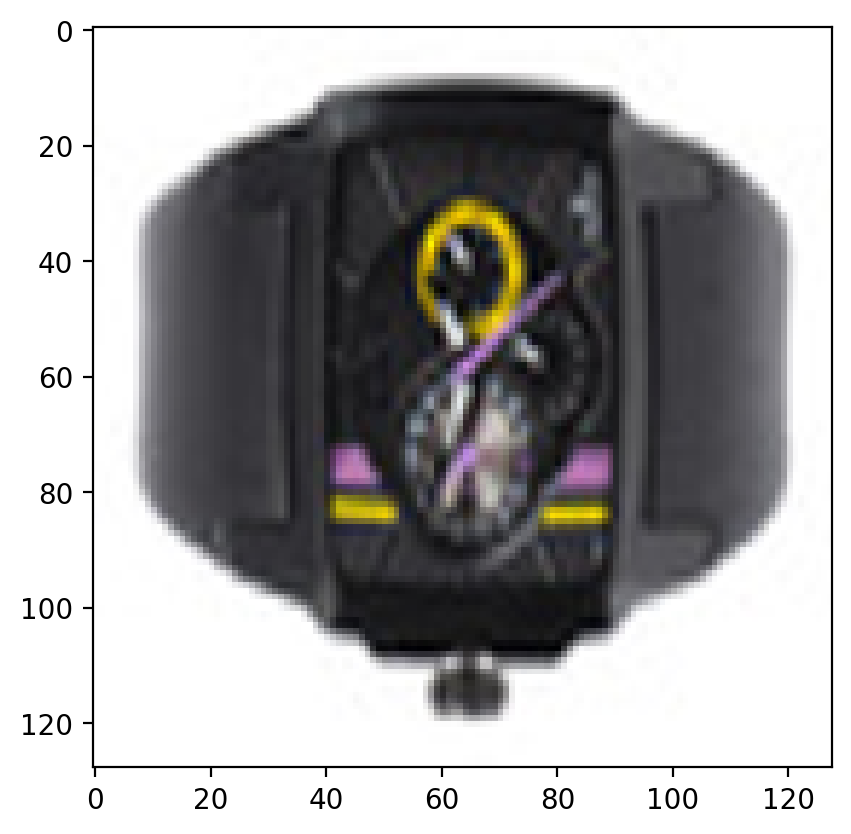

In [62]:
#Проверяем предсказание

ind = 640
preds = model.predict(np.expand_dims(Xtest[ind], axis=0))[0]  #делаем предсказание
 
pred_class = max(enumerate(preds),key=lambda x: x[1])[0]   # ищем максимум и его индекс в векторе предсказаний
real_class = max(enumerate(Ytest[ind]),key=lambda x: x[1])[0]  # определяем реальный класс

plt.imshow(Xtest[ind])
print(f"предсказанный класс {pred_class}, реальный класс {real_class}")